In [1]:
import random            #임의의 난수 생성 함수를 사용하게 한다.
import numpy as np      #numpy 라이브러리를 불러온다
import matplotlib.pyplot as plt  #그래프 생성 함수를 제공한다

In [2]:
class Stock:
    def __init__(self, price, ret, vol, quantity, unit_cost):
        self.price = price          #price: 현재의 주식 가격
        self.ret = ret              #ret : require return(기대수익률)
        self.vol = vol              #vol : volatility(변동성)
        self.quantity = quantity    #quantity : 주식발행 수
        self.unit_cost = unit_cost  #unit_cost: 주식 1주 대비 비용

    def get_future_prices(self, time, size, seed):
        np.random.seed(seed)         #임의의 동일한 seed를 통해 동일한 난수를 생성한다.
        future_prices = []           #생성된 future_prices를 리스트로 저장한다.
        for _ in range(size):        #필요한 갯수(size)만큼 반복한다.
            z = np.random.normal(0, 1) #임의의 정규분포값 z를 지정한다.
            future_price = self.price * np.exp(((self.ret - 0.5 * self.vol**2) * time) + self.vol * np.sqrt(time) * z)
            future_prices.append(future_price)    #future_prices 리스트에 위의 공식을 통해 계산된 future_price 입력
        return future_prices           #future_prices 리스트를 반환
    
    #future_costs 함수는 위의 future_prices 함수와 동일한 방식으로 제작되었다.
    def get_future_costs(self, time, size, seed):
        future_costs = []
        for _ in range(size):
            z = np.random.normal(0, 1)
            future_cost = self.unit_cost * np.exp(((self.ret - 0.5 * self.vol**2) * time) + self.vol * np.sqrt(time) * z)
            future_costs.append(future_cost)
        return future_costs   
    
    def mean_and_var(self, time, size, seed):       #size = n
        mean_price = np.mean(future_prices)         #future_prices의 평균을 np를 통해 저장한다.
        var_price = np.var(future_prices, ddof=1)   #future_prices의 분산을 np를 통해 저장한다.
        eve = self.price * np.exp(self.ret * time) #주어진 공식을 이용해 평균과 분산을 구한다.
        var = self.price**2 * np.exp(2 * self.ret * time) * (np.exp(self.vol**2 * time) - 1)
        return mean_price, var_price, eve, var     #mean_price, var_price, eve, var 값을 반환

    #히스토그램을 통해 future_prices의 개별 값들의 분포를 나타내려고 한다.
    def plot_future_price_histogram(self, time, size, seed):
        future_prices = self.get_future_prices(time, size, seed)  #get_future_prices 호출
        plt.hist(future_prices, bins=30, edgecolor='black')      #히스토그램의 막대 개수:30, 막대의 테두리 색상:검정으로 설정
        plt.title('Future Price Distribution')                   #이름: 'Future Price Distribution'
        plt.xlabel('Price')                                      #x축에 'Price'지정
        plt.ylabel('Frequency')                                 #y축에 'Frequency'지정
        plt.show()                                             #설정한 그래프를 출력

    #특정 연도의 각 가격과 비용에 따른 당기순이익을 구한다.
    #net_income을 구하기 위해선 depreciation을 고려해야 하나 한계가 존재해 제외하였다.
    def net_income(self, time, size, seed, tax_rate):
        future_prices = self.get_future_prices(time, size, seed) #net_income 정의하기 위해 get_future_prices 호출
        future_costs  = self.get_future_costs(time, size, seed) #net_income 정의하기 위해 get_future_prices 호출
        sales = np.array(future_prices) * self.quantity
        cost = np.array(future_costs) * self.quantity
        tax = (sales - cost) * tax_rate
        net_income = sales - cost - tax
        return net_income                                     #net_income 반환
    
    #각 가격과 비용에 따른 주당이익을 구한다.
    def Earning_per_Share(self, time, size, seed, tax_rate):
        net_income = self.net_income(time, size, seed, tax_rate) #EPS 정의하기 위해 net_income 호출
        EPS = net_income / self.quantity
        return EPS                                              #EPS 반환
    
    # 각 가격 별 주가수익비율을 구한다.
    def Price_Earning_Ratio(self, time, size, seed, tax_rate):
        future_prices = self.get_future_prices(time, size, seed)             #PER 정의하기 위해 future_prices 호출
        Earning_per_Share=self.Earning_per_Share(time, size, seed, tax_rate) #PER 정의하기 위해 Earning_per_share 호출
        PER=np.array(future_prices) / np.array(Earning_per_Share)
        return PER                                                          #PER 반환

In [3]:
#임의로 Class 내부의 멤버변수값을 지정한다.
price = 78875      #price: 현재의 주식 가격
ret = 0.05         #ret : require return(기대수익률)
vol = 0.2          #vol : volatility(변동성)
quantity = 1480    #quantity : 주식발행 수
unit_cost = 31254  #unit_cost: 주식 1주 대비 비용
stock = Stock(price, ret, vol, quantity, unit_cost)  # Stock 클래스의 인스턴스 생성

#임의로 멤버 함수 내부의 변수값을 지정한다.
time = 5 
size = 10
seed = 682
tax_rate = 0.21

#get_future_prices를 호출하여 주어진 시간과 개수에 따른 미래 가격을 얻으려 함.
future_prices = stock.get_future_prices(time, size, seed) 
future_prices_str = [f'{price:.4f}' for price in future_prices] #결과값의 소수점 아래 4자리까지 표시하는 문자열로 변환
print(f"주가 {time}년 후 예측: {future_prices_str}")

#net_income를 호출하여 주어진 시간과 개수에 따른 순이익값을 얻으려 함.
net_income = stock.net_income(time, size, seed, tax_rate)
net_income_str = [f'{income:.4f}' for income in net_income]    #결과값의 소수점 아래 4자리까지 표시하는 문자열로 변환.
print(f"Net Income: {net_income_str}")

#Earning_per_Share를 호출하여 주어진 시간과 개수에 따른 주당이익을 얻으려 함.
EPS = stock.Earning_per_Share(time, size, seed, tax_rate)
EPS_str = [f'{p:.4f}' for p in EPS]                           #결과값의 소수점 아래 4자리까지 표시하는 문자열로 변환
print(f"EPS: {EPS_str}")

#Price_Earning_Ratio를 호출하여 주어진 시간과 개수에 따른 주가수익비율을 얻으려 함.
PER = stock.Price_Earning_Ratio(time, size, seed, tax_rate)
PER_str = [f'{p:.4f}' for p in PER]                           #결과값의 소수점 아래 4자리까지 표시하는 문자열로 변환
print(f"PER: {PER_str}")

주가 5년 후 예측: ['40915.0909', '51640.7780', '62685.8865', '75669.9342', '45251.3990', '145325.6945', '87131.6548', '79118.4328', '39607.1998', '155992.0501']
Net Income: ['-8646265.1384', '-10886002.6647', '38017838.2172', '37181691.2849', '26727249.7596', '142179265.6093', '29032279.3882', '62688450.0843', '4585451.1069', '126011496.0288']
EPS: ['-5842.0710', '-7355.4072', '25687.7285', '25122.7644', '18058.9525', '96067.0714', '19616.4050', '42357.0609', '3098.2778', '85142.9027']
PER: ['-7.0035', '-7.0208', '2.4403', '3.0120', '2.5058', '1.5128', '4.4418', '1.8679', '12.7836', '1.8321']


In [4]:
#점차 size의 값이 커졌을 때 mean_price와 var_price가 eve, var에 근접해짐을 보인다.
size = 10    #size=10일 때 mean_price와 var_price를 구한다.
mean_price, var_price, eve, var = stock.mean_and_var(time, size, seed)
mean_price_str = f'{mean_price:.4f}'
var_price_str = f'{var_price:.4f}'
print(f"주가 {time}년 후 예측 평균: {mean_price_str}")
print(f"주가 {time}년 후 예측 표본 분산: {var_price_str}")

size=1000    #size=1000일 때 mean_price와 var_price를 구한다.
future_prices = stock.get_future_prices(time, size, seed) 
mean_price, var_price, eve, var = stock.mean_and_var(time, size, seed)
mean_price_str = f'{mean_price:.4f}'
var_price_str = f'{var_price:.4f}'
print(f"주가 {time}년 후 예측 평균: {mean_price_str}")
print(f"주가 {time}년 후 예측 표본 분산: {var_price_str}")

size = 100000 #size=100000일 때 mean_price와 var_price를 구한다.
future_prices = stock.get_future_prices(time, size, seed)
mean_price, var_price, eve, var = stock.mean_and_var(time, size, seed)
mean_price_str = f'{mean_price:.4f}'
var_price_str = f'{var_price:.4f}'
print(f"주가 {time}년 후 예측 평균: {mean_price_str}")
print(f"주가 {time}년 후 예측 표본 분산: {var_price_str}")
eve_str = f'{eve:.4f}'
var_str = f'{var:.4f}'

#마지막으로 eve, var를 소수점 아래 4자리까지 구하면서 size의 크기가 커짐에 따라 eve, var에 근접함을 보인다.
print(f"EVE: {eve_str}")
print(f"VAR: {var_str}")

주가 5년 후 예측 평균: 78333.8121
주가 5년 후 예측 표본 분산: 1728395671.5182
주가 5년 후 예측 평균: 99495.5599
주가 5년 후 예측 표본 분산: 2128071907.6734
주가 5년 후 예측 평균: 101253.7383
주가 5년 후 예측 표본 분산: 2273943012.6750
EVE: 101277.5047
VAR: 2270957529.6237


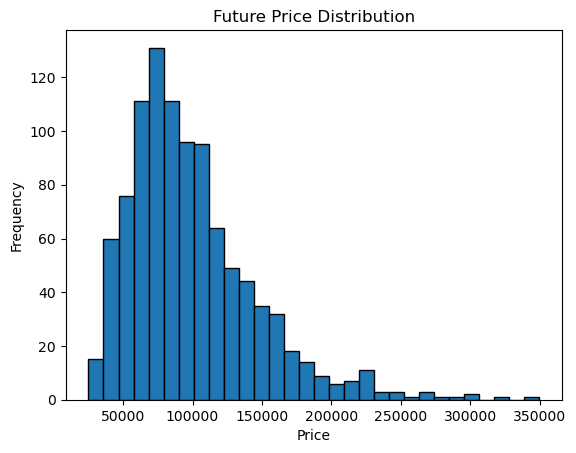

In [5]:
#임의로 size=1000일 때, 각 future_price의 분포 형태를 히스토그램을 통해 나타낸다.
size = 1000
stock.plot_future_price_histogram(time, size, seed)

In [6]:
net_income_mean = np.mean(net_income)           #net_income 결과값의 평균
print(f"Net Income 평균: {net_income_mean:.4f}")
EPS_mean = np.mean(EPS)                        #EPS 결과값의 평균
print(f"EPS 평균: {EPS_mean: .4f}")
PER_mean = np.mean(PER)                        #PER 결과값의 평균
print(f"PER 평균: {PER_mean:.4f}")

Net Income 평균: 44689145.3676
EPS 평균:  30195.3685
PER 평균: 1.6372
